In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

Data = pd.read_csv(r'D:\Desktop\case_1_toyproblem.csv')

x_data = Data[Data.columns[:-1]]
y_data = Data['y1']

for i in range(len(x_data.columns)):
    globals()['x{}'.format(i+1)] = Data[Data.columns[i]]

for i in range(len(x_data.columns)):
    globals()['diff_x{}'.format(i+1)] = np.gradient(y_data)/np.gradient(globals()['x{}'.format(i+1)])
    for j in range(len(x_data.columns)):
        globals()['diff_x{}_x{}'.format(i+1,j+1)] = np.gradient(globals()['diff_x{}'.format(i+1)])/np.gradient(globals()['x{}'.format(j+1)])

Taylor_data = pd.DataFrame()
for i in range(len(x_data.columns)):
    Taylor_data['x%d'%(i+1)] = globals()['x{}'.format(i+1)]
    Taylor_data['diff_x%d'%(i+1)] = globals()['diff_x{}'.format(i+1)]
    for j in range(len(x_data.columns)):
        Taylor_data['diff_x%d_x%d'%(i+1,j+1)] = globals()['diff_x{}_x{}'.format(i+1,j+1)]
        
Taylor_data['y1'] = y_data

Taylor_data.to_csv(r'D:\Desktop\case1_taylor_toy.csv',header=True,index=False)


In [2]:
def preprocess(Data,max_norm=0.9,min_norm=-0.9):
    Data = (Data - Data.min())/(Data.max() - Data.min())*(max_norm - min_norm) + min_norm
    return Data

In [3]:
Data = pd.read_csv(r'D:\Desktop\case_1_toyproblem.csv')
Data = preprocess(Data)
x_data = Data[Data.columns[:-1]]
y_data = Data[Data.columns[-1:]]

In [4]:
X = tf.placeholder(tf.float32,[None, len(x_data.columns)])
Y = tf.placeholder(tf.float32,[None, len(y_data.columns)])

L1 = tf.layers.dense(X, len(x_data.columns)/4, activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer(), bias_initializer=tf.contrib.layers.xavier_initializer(), name='W1')
# L2 = tf.layers.dense(L1, len(x_data.columns)/2, activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer(), bias_initializer=tf.contrib.layers.xavier_initializer(), name='W2')
# L3 = tf.layers.dense(L2, len(x_data.columns)/4, activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer(), bias_initializer=tf.contrib.layers.xavier_initializer(), name='W3')
# L4 = tf.layers.dense(L3, len(x_data.columns)/8, activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer(), bias_initializer=tf.contrib.layers.xavier_initializer(), name='W4')
# L5 = tf.layers.dense(L4, len(x_data.columns)/16, activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer(), bias_initializer=tf.contrib.layers.xavier_initializer(), name='W5')
model = tf.layers.dense(L1, len(y_data.columns), activation=None, kernel_initializer=tf.contrib.layers.xavier_initializer(), use_bias=False)

cost = tf.reduce_mean(tf.squared_difference(Y, model))
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
train_op = optimizer.minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()

In [5]:
overfitstep=0
sess.run(init)

In [6]:
for step in range(100000):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})
    
    if (step+1)%100 == 0:
        print(step+1,'step    cost: ',sess.run(cost, feed_dict={X: x_data, Y: y_data}))
    
    if step == 0:
        loss = sess.run(cost, feed_dict={X: x_data, Y: y_data})
    
    if loss >= sess.run(cost, feed_dict={X: x_data, Y: y_data}):
        loss = sess.run(cost, feed_dict={X: x_data, Y: y_data})
        overfitstep=0
    else:
        overfitstep += 1
        
    if overfitstep == 500:
        print('overfitting occurs! training early stopping....')
        break
print('training complete! loss : ', loss)

100 step    cost:  1.8171347
200 step    cost:  1.4154319
300 step    cost:  1.1558367
400 step    cost:  0.9868126
500 step    cost:  0.87473005
600 step    cost:  0.8128099
700 step    cost:  0.7903015
800 step    cost:  0.7870588
900 step    cost:  0.7867071
1000 step    cost:  0.78664935
1100 step    cost:  0.78663397
1200 step    cost:  0.7866235
1300 step    cost:  0.78661203
1400 step    cost:  0.7865999
1500 step    cost:  0.7865874
1600 step    cost:  0.7865734
1700 step    cost:  0.78655905
1800 step    cost:  0.78654367
1900 step    cost:  0.7865292
2000 step    cost:  0.7865154
2100 step    cost:  0.78650093
2200 step    cost:  0.7864878
2300 step    cost:  0.786481
2400 step    cost:  0.7864748
2500 step    cost:  0.78646773
2600 step    cost:  0.78646064
2700 step    cost:  0.78645307
2800 step    cost:  0.7864452
2900 step    cost:  0.786437
3000 step    cost:  0.7864304
3100 step    cost:  0.7864253
3200 step    cost:  0.78642404
3300 step    cost:  0.78642315
3400 step

26800 step    cost:  0.7844153
26900 step    cost:  0.7844153
27000 step    cost:  0.7844153
27100 step    cost:  0.7844153
27200 step    cost:  0.7844153
27300 step    cost:  0.7844153
27400 step    cost:  0.7844153
27500 step    cost:  0.7844153
27600 step    cost:  0.7844153
27700 step    cost:  0.7844153
27800 step    cost:  0.7844153
27900 step    cost:  0.7844153
28000 step    cost:  0.7844153
28100 step    cost:  0.7844153
28200 step    cost:  0.7844153
28300 step    cost:  0.7844153
28400 step    cost:  0.7844153
28500 step    cost:  0.7844153
28600 step    cost:  0.7844153
28700 step    cost:  0.7844153
28800 step    cost:  0.7844153
28900 step    cost:  0.7844153
29000 step    cost:  0.7844153
29100 step    cost:  0.7844153
29200 step    cost:  0.7844153
29300 step    cost:  0.7844153
29400 step    cost:  0.7844153
29500 step    cost:  0.7844153
29600 step    cost:  0.7844153
29700 step    cost:  0.7844153
29800 step    cost:  0.7844153
29900 step    cost:  0.7844153
30000 st

53300 step    cost:  0.7844153
53400 step    cost:  0.7844153
53500 step    cost:  0.7844153
53600 step    cost:  0.7844153
53700 step    cost:  0.7844153
53800 step    cost:  0.7844153
53900 step    cost:  0.7844153
54000 step    cost:  0.7844153
54100 step    cost:  0.7844153
54200 step    cost:  0.7844153
54300 step    cost:  0.7844153
54400 step    cost:  0.7844153
54500 step    cost:  0.7844153
54600 step    cost:  0.7844153
54700 step    cost:  0.7844153
54800 step    cost:  0.7844153
54900 step    cost:  0.7844153
55000 step    cost:  0.7844153
55100 step    cost:  0.7844153
55200 step    cost:  0.7844153
55300 step    cost:  0.7844153
55400 step    cost:  0.7844153
55500 step    cost:  0.7844153
55600 step    cost:  0.7844153
55700 step    cost:  0.7844153
55800 step    cost:  0.7844153
55900 step    cost:  0.7844153
56000 step    cost:  0.7844153
56100 step    cost:  0.7844153
56200 step    cost:  0.7844153
56300 step    cost:  0.7844153
56400 step    cost:  0.7844153
56500 st

79800 step    cost:  0.7844153
79900 step    cost:  0.7844153
80000 step    cost:  0.7844153
80100 step    cost:  0.7844153
80200 step    cost:  0.7844153
80300 step    cost:  0.7844153
80400 step    cost:  0.7844153
80500 step    cost:  0.7844153
80600 step    cost:  0.7844153
80700 step    cost:  0.7844153
80800 step    cost:  0.7844153
80900 step    cost:  0.7844153
81000 step    cost:  0.7844153
81100 step    cost:  0.7844153
81200 step    cost:  0.7844153
81300 step    cost:  0.7844153
81400 step    cost:  0.7844153
81500 step    cost:  0.7844153
81600 step    cost:  0.7844153
81700 step    cost:  0.7844153
81800 step    cost:  0.7844153
81900 step    cost:  0.7844153
82000 step    cost:  0.7844153
82100 step    cost:  0.7844153
82200 step    cost:  0.7844153
82300 step    cost:  0.7844153
82400 step    cost:  0.7844153
82500 step    cost:  0.7844153
82600 step    cost:  0.7844153
82700 step    cost:  0.7844153
82800 step    cost:  0.7844153
82900 step    cost:  0.7844153
83000 st

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

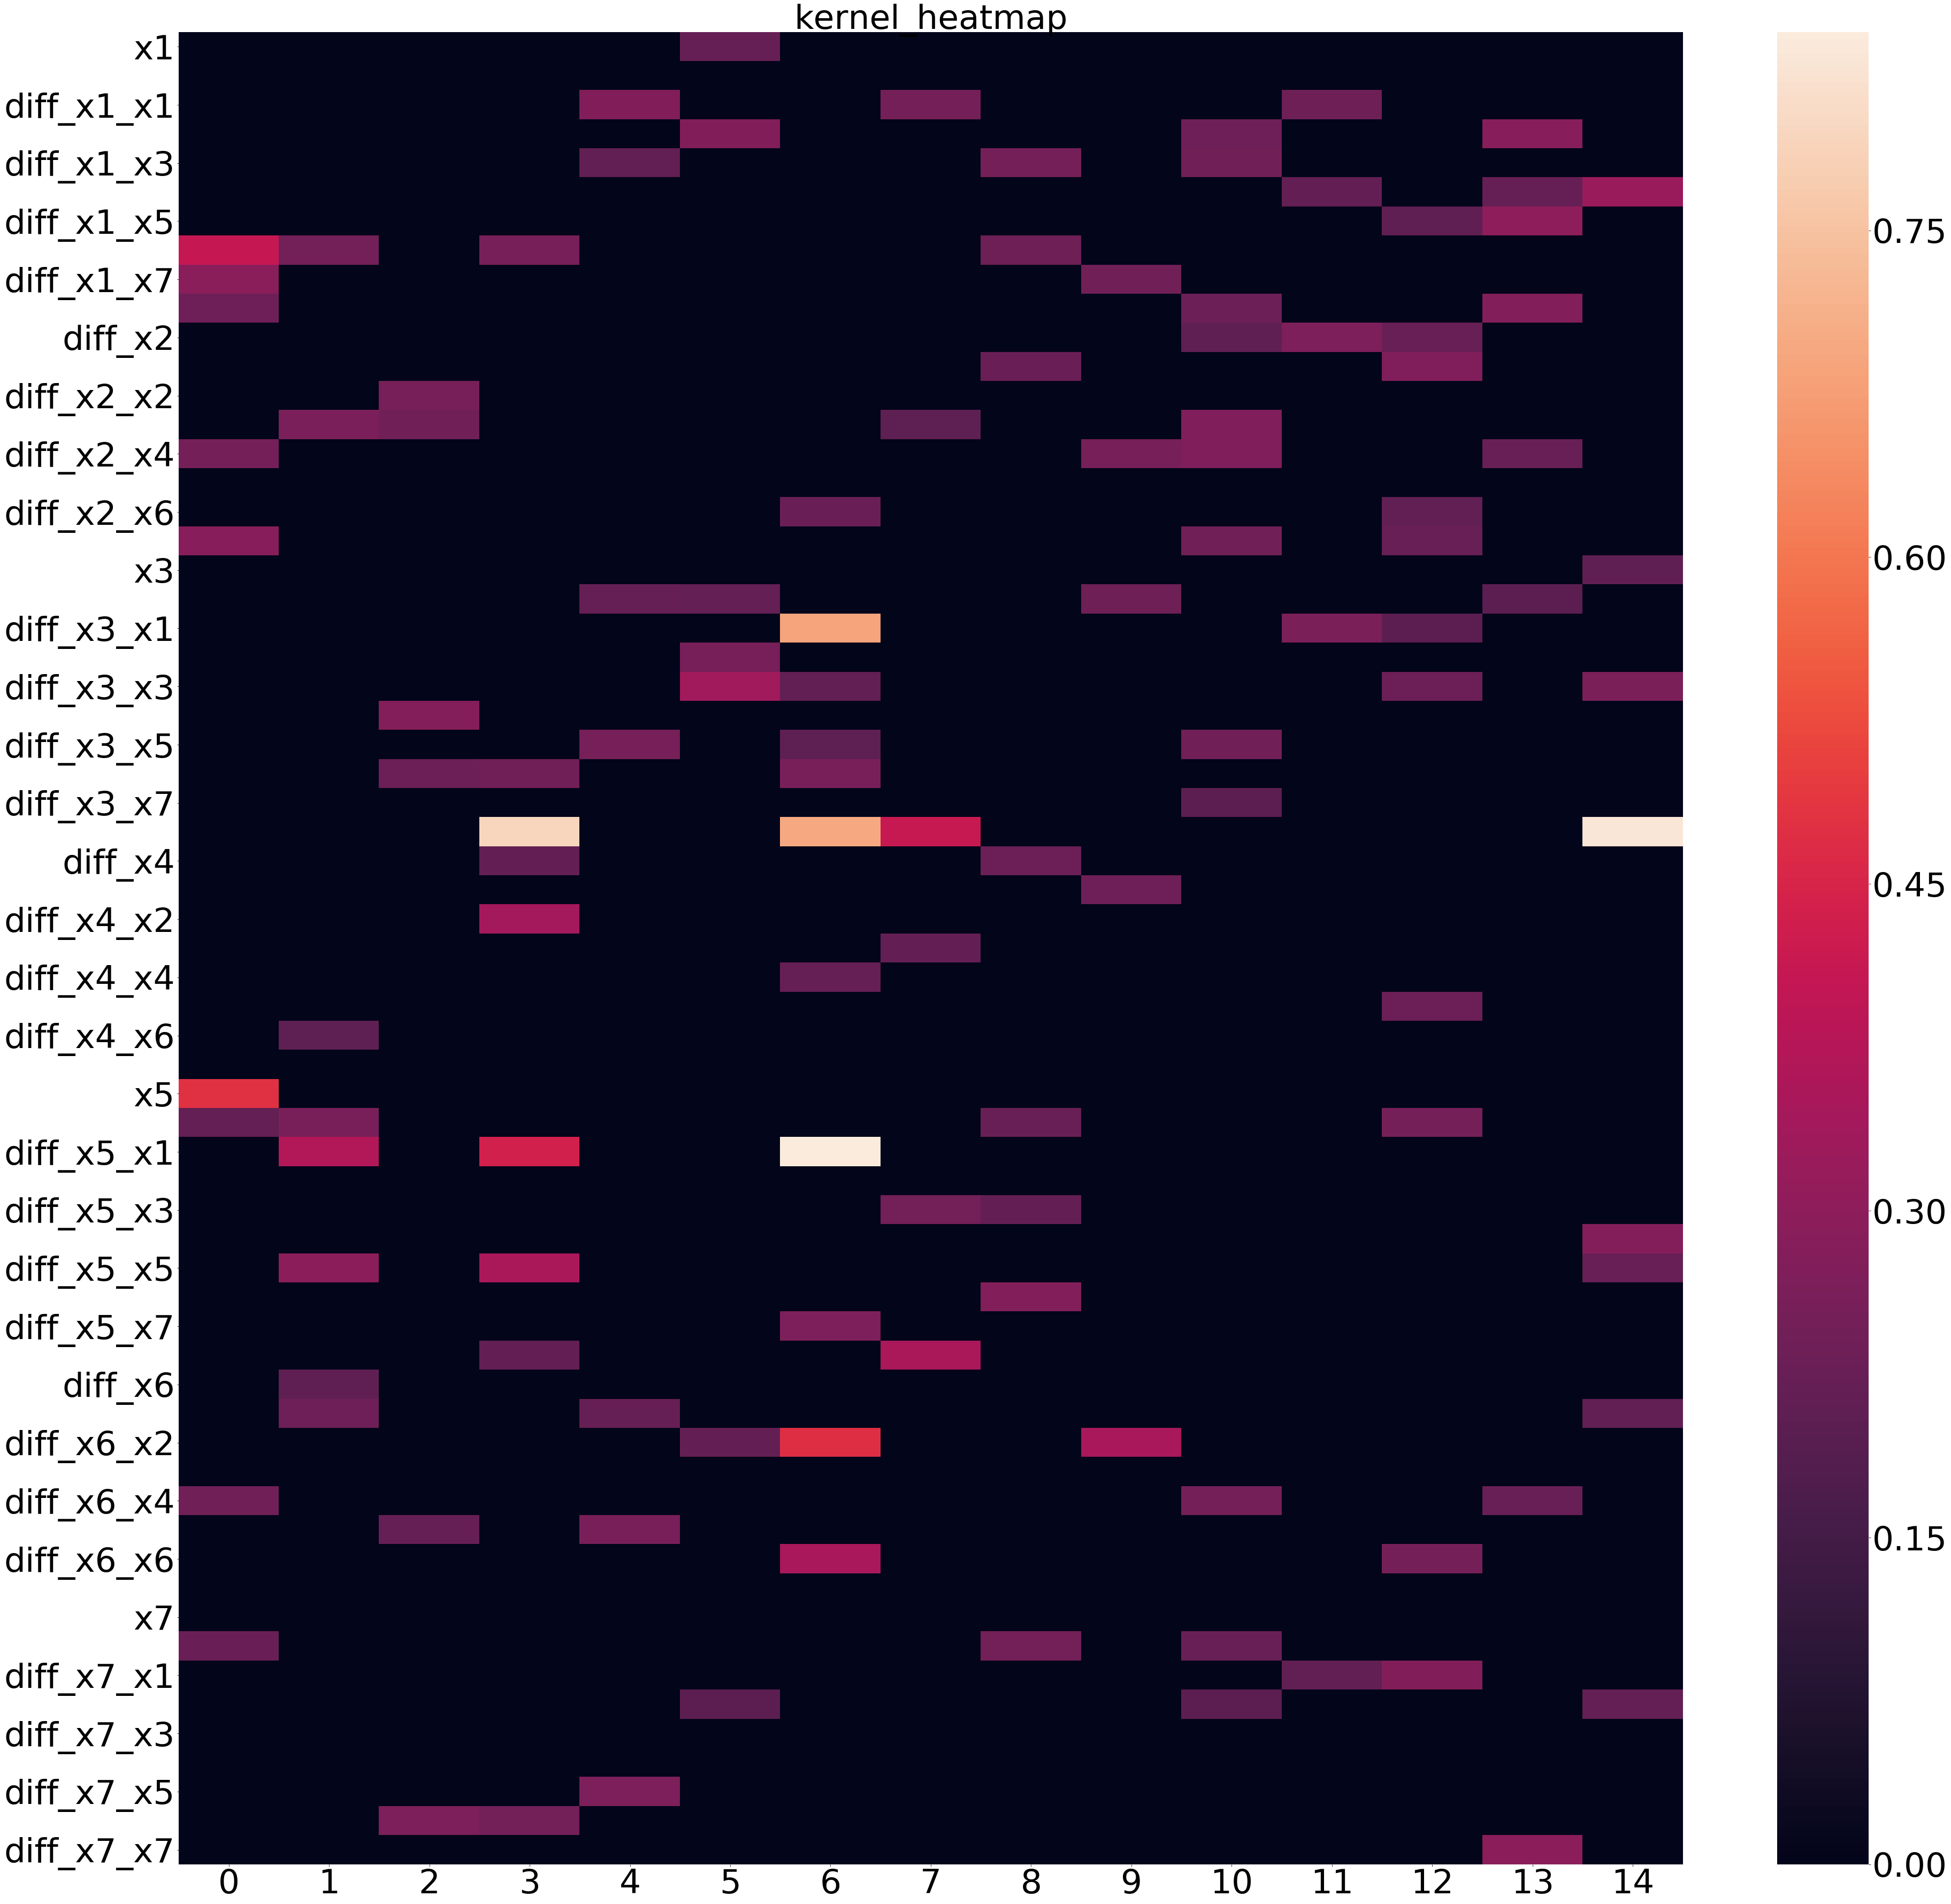

In [11]:
%matplotlib inline
with tf.variable_scope('W1', reuse=True):
    w = tf.get_variable('kernel')
    
W = sess.run(w)
#filter
for i in range(len(W)):
    for j in range(len(W[0])):
        if W[i][j] <= 0.2:
            W[i][j] = 0

kernel_W = pd.DataFrame(W, index=x_data.columns)
kernel_W
plt.figure(figsize=(63,63))
plt.rc('xtick', labelsize=63)
plt.rc('ytick', labelsize=63)
plt.title('kernel_heatmap', fontsize=63)
sns.heatmap(kernel_W)
plt.show()

In [10]:
list = [[1,2],[1,2],[1,2]]
len(list[0])

2

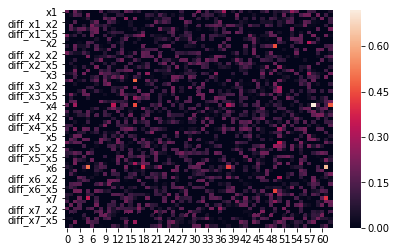

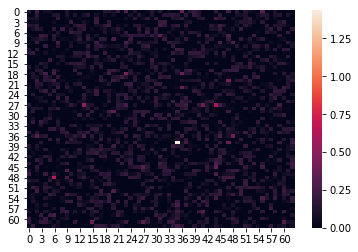

In [28]:
W = sess.run(w)

for i in range(len(W)):
    for j in range(len(W)):
        if W[i][j] <= 0:
            W[i][j] = 0
sns.heatmap(W)
plt.show()

In [27]:
W[0][0]

0.1422826